In [1]:
from IPython.display import HTML, display
css_file_path = "../../design/custom.css"
styles = "<link rel='stylesheet' href='%s'>" % css_file_path
display(HTML(styles))

# 3.5 $\quad$ Ejemplos de Optimización usando la librería riskfolio

Para instalar la librería Riskfolio es necesario el siguiente comando:

    pip install riskfolio-lib
    
Si por algún motivo no podéis instalarlo, aquí tenéis la documentación de los [requisitos de instalación](https://riskfolio-lib.readthedocs.io/en/latest/install.html)

In [4]:
import numpy as np
import pandas as pd
import yfinance as yf
import riskfolio as rp
import warnings

warnings.filterwarnings("ignore")
pd.options.display.float_format = '{:.4%}'.format

Los ejemplos mostrados en este notebook (y muchos otros) se pueden encontrar el la documentación de la librería [Riskfolio](https://riskfolio-lib.readthedocs.io/en/latest/index.html)

In [5]:
# Date range
start = '2016-01-01'
end = '2019-12-30'

# Tickers of assets
assets = ['APA', 'BA', 'BAX', 'BMY', 'CMCSA', 'CNP', 'CPB', 'DE', 'HPQ', 'JCI',
        'JPM', 'LUV', 'MMC', 'MO', 'MSFT', 'NI', 'PCAR', 'PSA', 'SEE', 'T',
        'TGT', 'TMO', 'TXT', 'VZ', 'ZION']

# Downloading data
data = yf.download(assets, start = start, end = end)['Adj Close']

data.columns = assets

[*********************100%%**********************]  25 of 25 completed


In [6]:
returns = data.pct_change().dropna()
returns.head(2)

,APA,BA,BAX,BMY,CMCSA,CNP,CPB,DE,HPQ,JCI,...,NI,PCAR,PSA,SEE,T,TGT,TMO,TXT,VZ,ZION
Date,,,,,,,,,,,,,,,,,,,,,
2016-01-05,-2.0257%,0.4057%,0.4035%,1.9692%,0.0180%,0.9305%,0.3678%,0.5783%,0.9483%,-1.1953%,...,1.5881%,0.0212%,2.8236%,0.9758%,0.6987%,1.7539%,-0.1730%,0.2410%,1.3734%,-1.0857%
2016-01-06,-11.4863%,-1.5879%,0.2412%,-1.7556%,-0.7727%,-1.2473%,-0.1736%,-1.1239%,-3.5867%,-0.9551%,...,0.5547%,0.0212%,0.1592%,-1.5647%,0.3108%,-1.0155%,-0.7653%,-3.0048%,-0.9035%,-2.9145%


## 1. Estimación de las carteras Rentabilidad Riesgo

### Cartera con ratio de sharpe máximo

In [7]:
# Building the portfolio object
port = rp.Portfolio(returns=returns)

# Calculating optimal portfolio

# Select method and estimate input parameters:

method_mu='hist' # Method to estimate expected returns based on historical data.
method_cov='hist' # Method to estimate covariance matrix based on historical data.

port.assets_stats(method_mu=method_mu, method_cov=method_cov, d=0.94)

# Estimate optimal portfolio:

model='Classic' # Could be Classic (historical), BL (Black Litterman) or FM (Factor Model)
rm = 'MV' # Risk measure used, this time will be variance
obj = 'Sharpe' # Objective function, could be MinRisk, MaxRet, Utility or Sharpe
hist = True # Use historical scenarios for risk measures that depend on scenarios
rf = 0 # Risk free rate
l = 0 # Risk aversion factor, only useful when obj is 'Utility'

w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)

display(w.T)


,APA,BA,BAX,BMY,CMCSA,CNP,CPB,DE,HPQ,JCI,...,NI,PCAR,PSA,SEE,T,TGT,TMO,TXT,VZ,ZION
weights,0.0000%,6.1590%,11.5019%,0.0000%,0.0000%,8.4806%,0.0000%,3.8193%,0.0000%,0.0000%,...,10.8263%,0.0000%,0.0000%,0.0000%,0.0000%,7.1804%,0.0000%,0.0000%,4.2740%,0.0000%


### Composición de la cartera

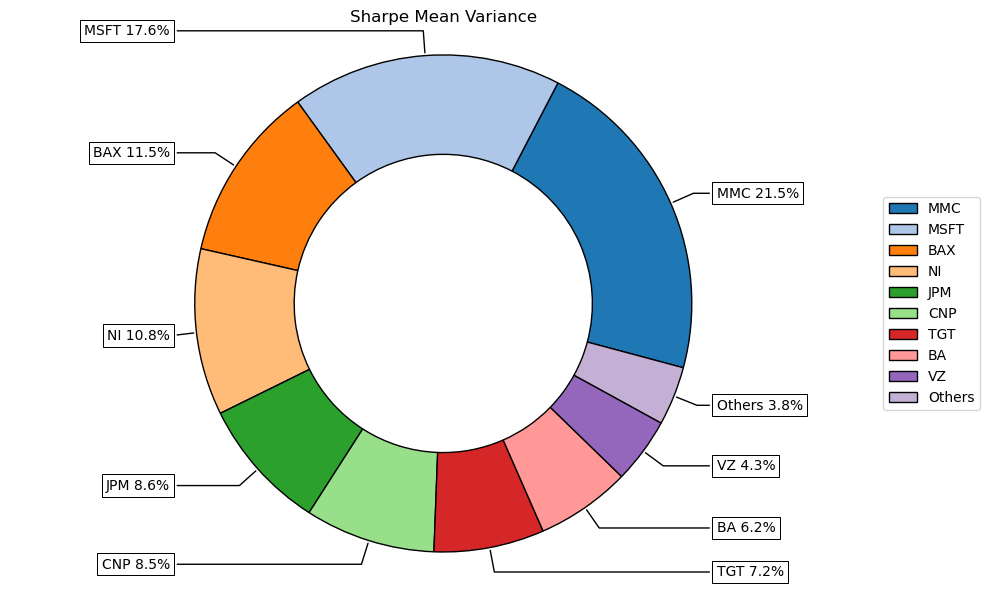

In [8]:
# Plotting the composition of the portfolio

ax = rp.plot_pie(w=w, title='Sharpe Mean Variance', others=0.05, nrow=25, cmap = "tab20",
                 height=6, width=10, ax=None)

### Cálculo de la frontera eficiente

In [9]:
points = 50 # Number of points of the frontier

frontier = port.efficient_frontier(model=model, rm=rm, points=points, rf=rf, hist=hist)

display(frontier.T.head())

,APA,BA,BAX,BMY,CMCSA,CNP,CPB,DE,HPQ,JCI,...,NI,PCAR,PSA,SEE,T,TGT,TMO,TXT,VZ,ZION
0,0.0000%,0.0000%,5.2377%,4.3880%,2.1296%,6.9906%,3.2270%,0.0741%,0.0000%,2.8447%,...,11.4529%,0.0000%,14.9247%,0.1681%,6.5903%,4.0900%,0.0000%,0.0000%,8.2767%,0.0000%
1,0.0000%,2.0125%,8.4903%,0.7981%,1.6844%,8.5600%,2.1530%,1.3613%,0.0000%,1.0444%,...,13.4496%,0.0000%,9.2100%,0.0000%,5.5816%,5.5235%,0.0000%,0.0000%,8.7591%,0.0000%
2,0.0000%,2.8165%,9.3711%,0.0000%,1.1979%,9.1477%,1.7065%,1.7396%,0.0000%,0.0871%,...,14.2327%,0.0000%,6.4848%,0.0000%,5.1003%,6.0539%,0.0000%,0.0000%,9.0039%,0.0000%
3,0.0000%,3.4305%,9.9328%,0.0000%,0.5693%,9.5578%,1.0811%,1.9316%,0.0000%,0.0000%,...,14.7707%,0.0000%,3.6631%,0.0000%,4.2579%,6.4249%,0.0000%,0.0000%,9.2132%,0.0000%
4,0.0000%,3.9343%,10.3865%,0.0000%,0.0003%,9.8875%,0.3998%,2.0811%,0.0000%,0.0000%,...,15.1318%,0.0000%,1.0859%,0.0000%,3.3464%,6.7109%,0.0000%,0.0000%,9.2764%,0.0000%


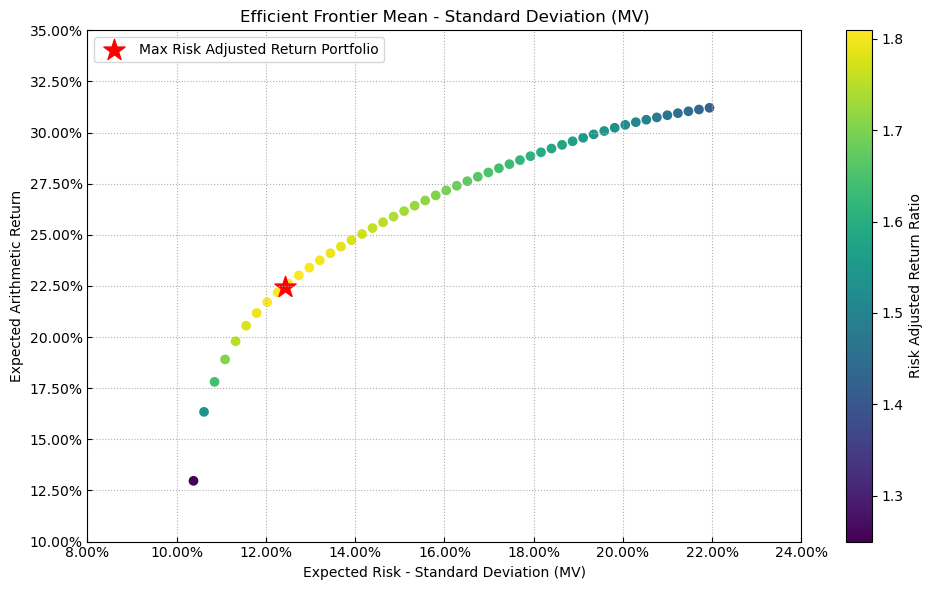

In [10]:
# Plotting the efficient frontier

label = 'Max Risk Adjusted Return Portfolio' # Title of point
mu = port.mu # Expected returns
cov = port.cov # Covariance matrix
returns = port.returns # Returns of the assets

ax = rp.plot_frontier(w_frontier=frontier, mu=mu, cov=cov, returns=returns, rm=rm,
                      rf=rf, alpha=0.05, cmap='viridis', w=w, label=label,
                      marker='*', s=16, c='r', height=6, width=10, ax=None)

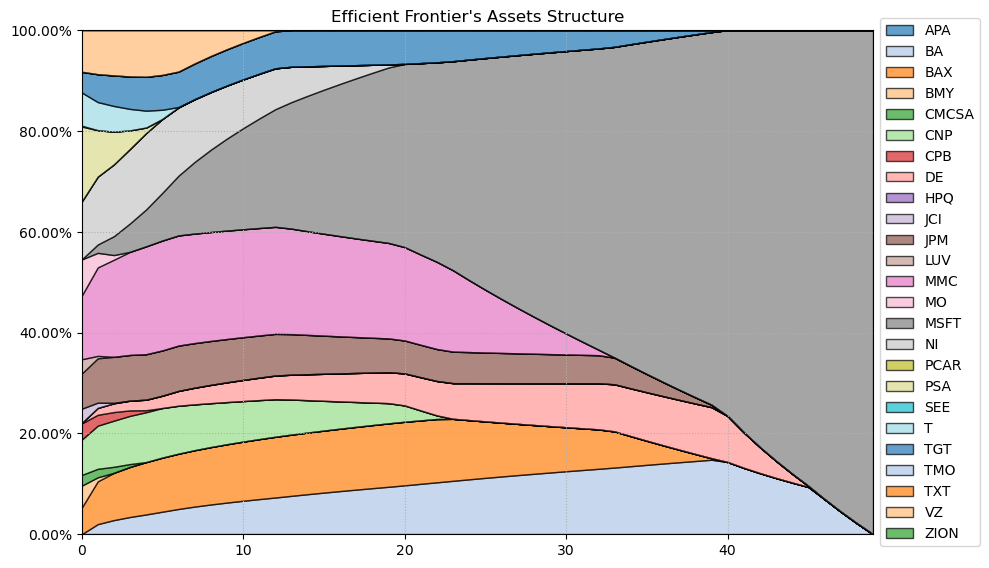

In [11]:
# Plotting efficient frontier composition
ax = rp.plot_frontier_area(w_frontier=frontier, cmap="tab20", height=6, width=10, ax=None)

### Cálculo de las carteras óptimas para varias medidas de riesgo

In [12]:
# Risk Measures available:
#
# 'MV': Standard Deviation.
# 'MAD': Mean Absolute Deviation.
# 'MSV': Semi Standard Deviation.
# 'FLPM': First Lower Partial Moment (Omega Ratio).
# 'SLPM': Second Lower Partial Moment (Sortino Ratio).
# 'CVaR': Conditional Value at Risk.
# 'EVaR': Entropic Value at Risk.
# 'WR': Worst Realization (Minimax)
# 'MDD': Maximum Drawdown of uncompounded cumulative returns (Calmar Ratio).
# 'ADD': Average Drawdown of uncompounded cumulative returns.
# 'CDaR': Conditional Drawdown at Risk of uncompounded cumulative returns.
# 'EDaR': Entropic Drawdown at Risk of uncompounded cumulative returns.
# 'UCI': Ulcer Index of uncompounded cumulative returns.

rms = ['MV', 'MAD', 'MSV', 'FLPM', 'SLPM', 'CVaR',
       'EVaR', 'WR', 'MDD', 'ADD', 'CDaR', 'UCI', 'EDaR']

w_s = pd.DataFrame([])

for i in rms:
    w = port.optimization(model=model, rm=i, obj=obj, rf=rf, l=l, hist=hist)
    w_s = pd.concat([w_s, w], axis=1)
    
w_s.columns = rms

In [13]:
w_s.style.format("{:.2%}").background_gradient(cmap='YlGn')

,MV,MAD,MSV,FLPM,SLPM,CVaR,EVaR,WR,MDD,ADD,CDaR,UCI,EDaR
APA,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
BA,6.16%,7.63%,4.38%,6.11%,3.98%,0.00%,1.58%,0.00%,1.20%,6.79%,2.82%,6.34%,0.00%
BAX,11.50%,9.23%,10.37%,9.04%,10.62%,12.35%,4.66%,0.00%,0.00%,4.48%,0.00%,4.34%,0.00%
BMY,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
CMCSA,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
CNP,8.48%,7.21%,9.15%,5.96%,9.38%,7.49%,30.11%,28.96%,56.01%,13.49%,32.93%,18.16%,42.77%
CPB,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,5.37%,0.00%,0.00%,0.00%,0.00%,0.00%
DE,3.82%,2.73%,1.18%,2.33%,0.90%,5.14%,0.00%,0.00%,13.08%,1.49%,0.82%,1.01%,2.98%
HPQ,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
JCI,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%


### Carteras Óptimas con restricciones en activos y clases de activos

In [15]:
asset_classes = pd.read_excel('../data/asset_classes.xlsx', header=0)

In [16]:
asset_classes.head()

,Assets,Industry
0,APA,Energy
1,BA,Financials
2,BAX,Health Care
3,BMY,Health Care
4,CMCSA,Consumer Discretionary


In [17]:
constraints = pd.read_excel('../data/constraints.xlsx')

In [18]:
constraints.head()

,Disabled,Type,Set,Position,Sign,Weight,Type Relative,Relative Set,Relative,Factor
0,False,All Assets,NaN,NaN,<=,10.0000%,NaN,NaN,NaN,NaN
1,False,Classes,Industry,Financials,<=,20.0000%,NaN,NaN,NaN,NaN
2,False,Classes,Industry,Utilities,<=,20.0000%,NaN,NaN,NaN,NaN
3,False,Classes,Industry,Industrials,<=,20.0000%,NaN,NaN,NaN,NaN
4,False,Classes,Industry,Consumer Discretionary,<=,20.0000%,NaN,NaN,NaN,NaN


In [19]:
A, B = rp.assets_constraints(constraints, asset_classes)

In [20]:
port.ainequality = A
port.binequality = B

model = 'Classic'
rm = 'MV'
obj = 'Sharpe'
rf = 0

w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)

display(w.T)

,APA,BA,BAX,BMY,CMCSA,CNP,CPB,DE,HPQ,JCI,...,NI,PCAR,PSA,SEE,T,TGT,TMO,TXT,VZ,ZION
weights,0.0000%,3.7276%,10.0000%,0.0000%,1.7589%,10.0000%,0.0000%,9.0765%,0.0000%,0.0000%,...,10.0000%,0.0000%,0.0000%,0.0000%,0.0012%,9.4403%,9.7230%,0.0000%,10.0000%,0.0000%


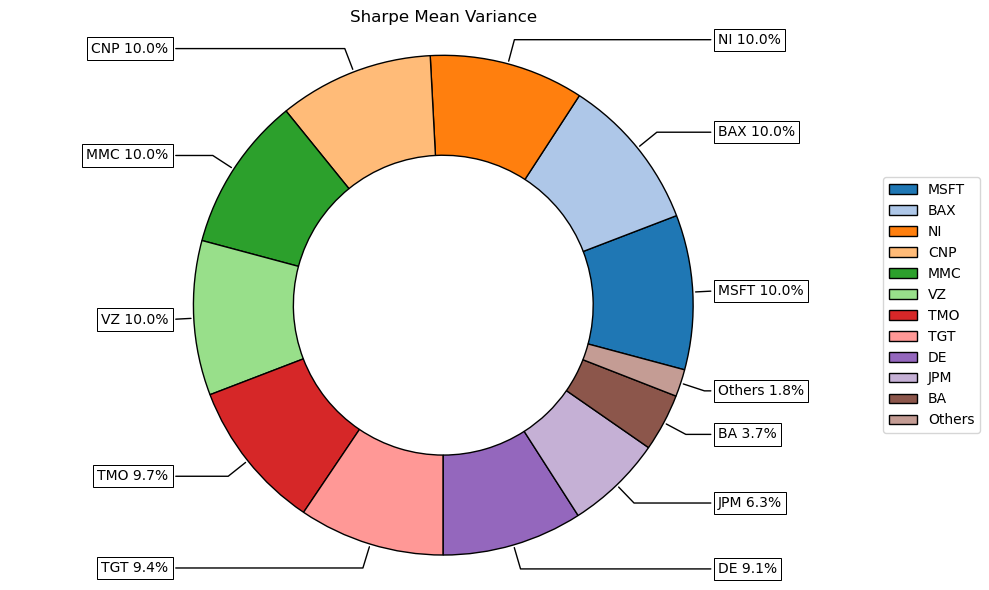

In [21]:
ax = rp.plot_pie(w=w, title='Sharpe Mean Variance', others=0.05, nrow=25, cmap = "tab20",
                 height=6, width=10, ax=None)

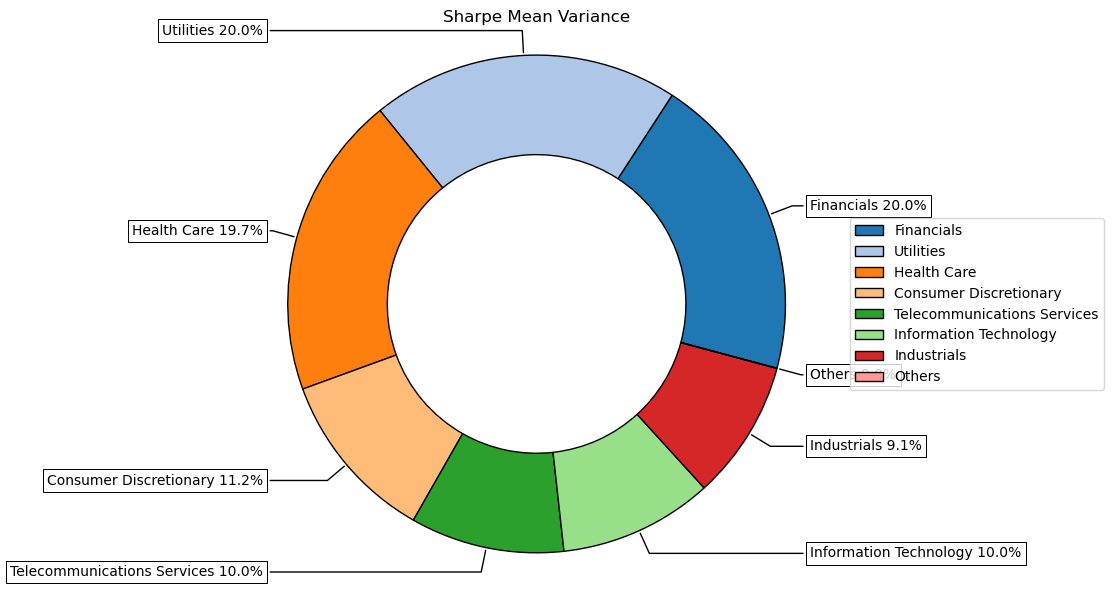

In [22]:
w_classes = pd.concat([asset_classes.set_index('Assets'), w], axis=1)

w_classes = w_classes.groupby(['Industry']).sum()

ax = rp.plot_pie(w=w_classes, title='Sharpe Mean Variance', others=0.05, nrow=25,
                 cmap = "tab20", height=6, width=10, ax=None)